In [2]:
setwd('/import/jliu/data2/')

In [3]:
load('combat_edata_matrix3.rda')

In [ ]:
head(combat_edata1,2)

head(anno,2)

In [9]:
library(dplyr)

In [8]:
CI   = anno %>%  dplyr::filter(group == 'CI') %>%  rownames()

In [34]:
exp =  combat_edata1[c('FAM200B','BCL2A1','IGJ','TXN'),CI]   

In [35]:
library(ConsensusClusterPlus)

In [36]:
library(NMF) 

con <- ConsensusClusterPlus(exp, #矩阵形式
                            maxK=10, #最大聚类簇数量
                            reps=100, #抽取的子样本数量
                            pItem=0.8,#抽样样本的比例 
                            pFeature=1,
                            title="resultstrain2", #输出文件夹名字
                            clusterAlg="km", #选择聚类算法
                            distance="euclidean", #指定聚类时使用的距离或相关性类型
                            seed=1234, #中子数
                            plot="png", #输出格式 （pdf可能会比较难打开）
                            writeTable=TRUE)

end fraction

clustered

clustered

clustered

clustered

clustered

clustered

clustered

clustered

clustered



In [52]:
# dim(expr)

# expr1 = log2(expr+1)

# nmfinput = as.data.frame(expr1)

# library(NMF)

# ranks <- 1:10
# estim.coad <- nmf(nmfinput,ranks, nrun=20)
# duplicated(colnames(nmfinput))



# plot(estim.coad)

# seed = 2020820
# nmf.rank4 <- nmf(nmfinput, 
#                  rank = 2, 
#                  nrun=50,
#                  seed = seed, 
#                  method = "brunet")

# jco <- c("#EABF00","#C6524A","#868686")
# index <- extractFeatures(nmf.rank4,"max") 
# sig.order <- unlist(index)
# NMF.Exp.rank4 <- nmfinput[sig.order,]
# NMF.Exp.rank4 <- na.omit(NMF.Exp.rank4) #sig.order有时候会有缺失值
# group <- predict(nmf.rank4) # 提出亚型
# table(group)
# consensusmap(nmf.rank4,
#              labRow = NA,
#              labCol = NA,
#              annCol = data.frame("cluster"=group[colnames(NMF.Exp.rank4)]),
#              annColors = list(cluster=c("1"=jco[1],"2"=jco[2])))

# library(tinyarray)

# dim(nmfinput)

In [38]:
    group1 = read.csv('./resultstrain2/resultstrain2.k=2.consensusClass.csv',header =F)

### group1 和group2的差异分析

In [69]:
expr = combat_edata1 %>% as.data.frame()

In [70]:
n=expr[,group1$V1]

In [71]:
group = paste0('subtype',group1$V2)

In [72]:
group_list <- factor(group,levels = c("subtype1","subtype2"),ordered = F)

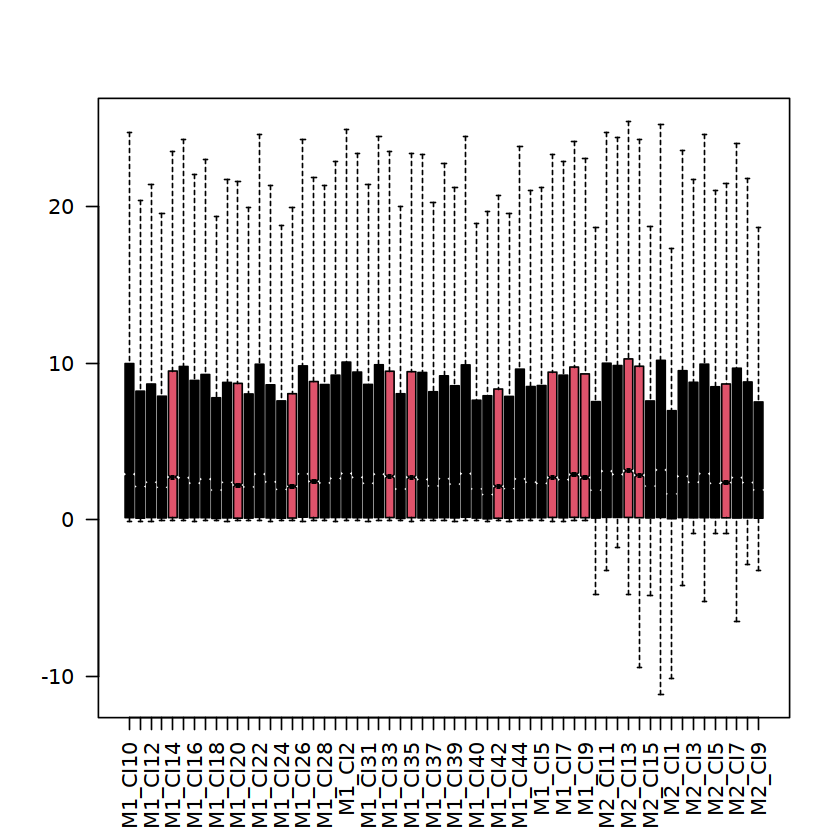

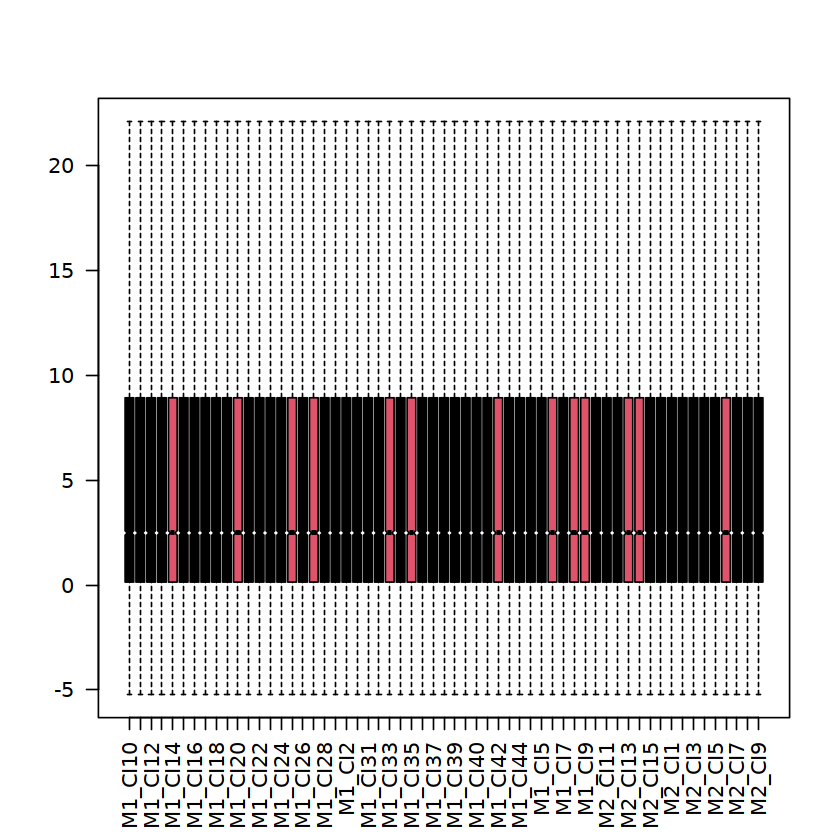

In [73]:
exprSet <- n
boxplot(exprSet,outline=FALSE, notch=T,col=group_list, las=2)
library(limma) 
exprSet=normalizeBetweenArrays(exprSet)
boxplot(exprSet,outline=FALSE, notch=T,col=group_list, las=2)

In [74]:
dat <- exprSet
design=model.matrix(~factor( group ))
fit=lmFit(dat,design)
fit=eBayes(fit)
options(digits = 4)
topTable(fit,coef=2,adjust='BH')
bp=function(g){
  library(ggpubr)
  df=data.frame(gene=g,stage=group)
  p <- ggboxplot(df, x = "stage", y = "gene",
                 color = "stage", palette = "jco",
                 add = "jitter")
  #  Add p-value
  p + stat_compare_means()
}
deg=topTable(fit,coef=2,adjust='BH',number = Inf)
head(deg) 

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IGJ,112.86885,68.35730,9.553,1.798e-13,3.134e-09,17.686
GPRC5D,0.84257,0.59792,7.166,1.613e-09,1.406e-05,10.385
TNFRSF17,0.93966,0.64752,6.312,4.280e-08,2.487e-04,7.668
GLDC,0.32155,0.22978,6.174,7.258e-08,3.163e-04,7.227
EYA2,0.09365,0.06095,5.794,3.051e-07,1.064e-03,6.024
TXNDC5,0.27778,0.52405,5.350,1.591e-06,4.624e-03,4.634
IGF1,0.08446,0.04551,5.240,2.386e-06,5.942e-03,4.292
HRASLS2,0.82265,0.45821,5.108,3.861e-06,8.415e-03,3.886
MZB1,5.47045,5.93245,4.679,1.795e-05,3.477e-02,2.588


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IGJ,112.86885,68.35730,9.553,1.798e-13,3.134e-09,17.686
GPRC5D,0.84257,0.59792,7.166,1.613e-09,1.406e-05,10.385
TNFRSF17,0.93966,0.64752,6.312,4.280e-08,2.487e-04,7.668
GLDC,0.32155,0.22978,6.174,7.258e-08,3.163e-04,7.227
EYA2,0.09365,0.06095,5.794,3.051e-07,1.064e-03,6.024
TXNDC5,0.27778,0.52405,5.350,1.591e-06,4.624e-03,4.634


In [84]:
deg[c('FAM200B','BCL2A1','IGJ','TXN'),]

,logFC,AveExpr,t,P.Value,adj.P.Val,B,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
FAM200B,0.107,6.965,0.1763,8.606e-01,9.940e-01,-5.724,NoSignifi
BCL2A1,8.761,46.295,0.9347,3.538e-01,9.882e-01,-5.342,NoSignifi
IGJ,112.869,68.357,9.5534,1.798e-13,3.134e-09,17.686,Up
TXN,1.915,21.412,0.6729,5.037e-01,9.882e-01,-5.532,NoSignifi


In [85]:
padj = 0.05
foldChange = 0.5

deg$group = as.factor(ifelse(deg$P.Value < padj & abs(deg$logFC	) > foldChange, 
                                 ifelse(deg$logFC	> foldChange ,'Up','Down'),'NoSignifi'))
table(deg$group)


     Down NoSignifi        Up 
      140     17151       143 

In [86]:
cg = deg %>% dplyr::filter(group != 'NoSignifi') %>%  rownames()
n=exprSet[cg,group1$V1]
group3 = group1$V2
names(group3) = group1$V1
group4 = as.factor(group3)
library(tinyarray)

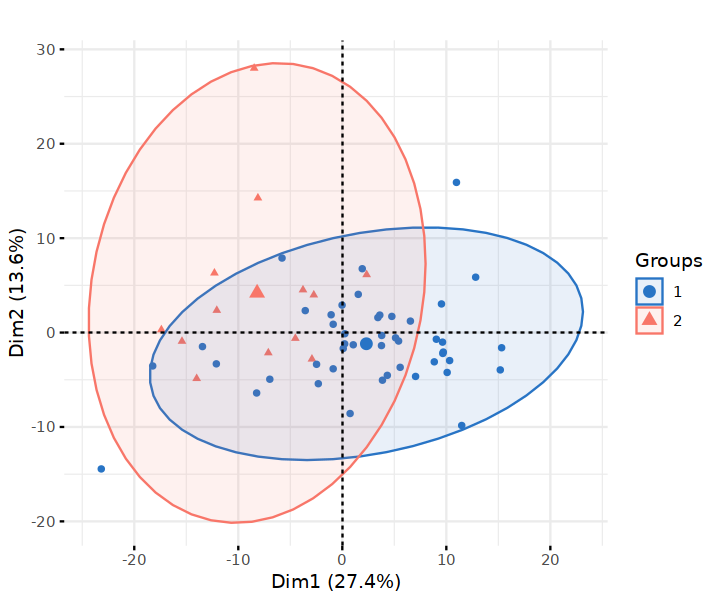

In [87]:
draw_pca(n,group4)

### 差异基因表达热图  这里是subtype2 与subtype1比

In [88]:
data1 = n

In [89]:
library(pheatmap)
forplot = na.omit(data1)
#forplot = forplot[rowSums(forplot) >100,]
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

[1] 283  59

In [103]:
library(pheatmap)
annotation_col = data.frame(group)
colnames(annotation_col) = 'group'
row.names(annotation_col) <- colnames(dat)
head(dat,2)

,M1_CI10,M1_CI11,M1_CI12,M1_CI13,M1_CI14,M1_CI15,M1_CI16,M1_CI17,M1_CI18,M1_CI19,...,M2_CI16,M2_CI1,M2_CI2,M2_CI3,M2_CI4,M2_CI5,M2_CI6,M2_CI7,M2_CI8,M2_CI9
IGJ,-0.09287,-0.2974,-0.2592,-0.9910,0.6440,0.77019,-0.3874,-0.9061,-0.48139,-0.2024,...,-0.5256,-0.8691,0.1037,-0.3161,0.16778,-0.7409,0.4952,0.0160,-0.8511,-0.2038
GPRC5D,-0.92834,-0.6609,-0.4531,-0.9928,-0.2775,0.07027,-0.2942,-1.0178,-0.08441,-0.2803,...,-1.0910,-0.4366,0.4544,-0.4440,-0.08936,-0.8071,1.4264,-0.4082,-0.9603,0.2873


In [91]:
options(repr.plot.width = 6,repr.plot.height = 5)

In [92]:
#dat = dat[c('FAM200B','BCL2A1','IGJ','TXN'),]

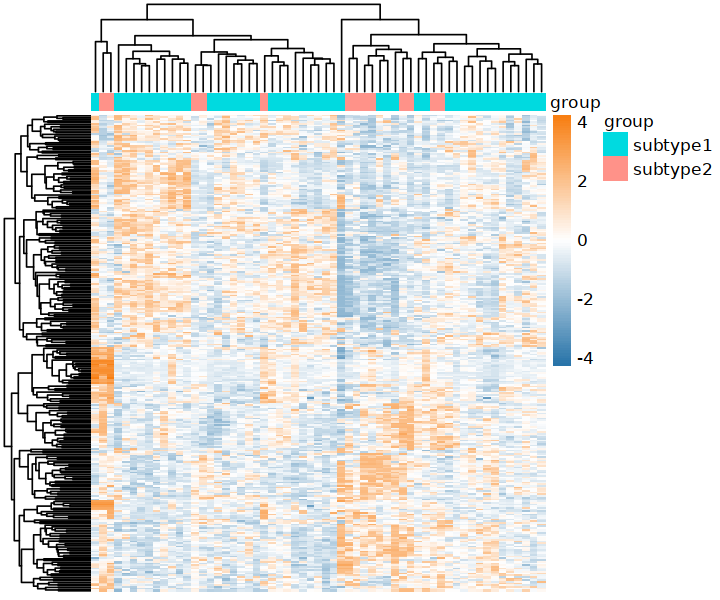

In [93]:
pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=FALSE,
         show_colnames = FALSE,
          scale="row",
        annotation_col = annotation_col,
              #annotation_row = cu.gene,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2874A9", "white", "#F87F13"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

In [105]:
table(deg$group)


     Down NoSignifi        Up 
      140     17151       143 

In [106]:
deg$symbol=rownames(deg)
  library(ggplot2)
  library(clusterProfiler)
  library(org.Hs.eg.db)
  df <- bitr(unique(deg$symbol), fromType = "SYMBOL",
             toType = c( "ENTREZID"),
             OrgDb = org.Hs.eg.db)
  head(df)
  DEG=deg
  head(DEG)

  DEG=merge(DEG,df,by.y='SYMBOL',by.x='symbol')
  head(DEG)

  save(DEG,file = 'anno_DEG.Rdata')
  gene_up= DEG[DEG$group == 'Up','ENTREZID'] 
  gene_down=DEG[DEG$group == 'Down','ENTREZID'] 
gene_all= DEG[DEG$group == 'NoSignifi','ENTREZID'] 

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: 'clusterProfiler'


The following object is masked from 'package:stats':

    filter


Loading required package: AnnotationDbi

Warning message:
"package 'AnnotationDbi' was built under R version 4.2.2"
Loading required package: stats4

Loading required package: IRanges

Warning message:
"package 'IRanges' was built under R version 4.2.3"
Loading required package: S4Vectors

Warning message:
"package 'S4Vectors' was built under R version 4.2.3"

Attaching package: 'S4Vectors'


The following object is masked from 'package:clusterProfiler

,SYMBOL,ENTREZID
,<chr>,<chr>
2,GPRC5D,55507
3,TNFRSF17,608
4,GLDC,2731
5,EYA2,2139
6,TXNDC5,81567
7,IGF1,3479


,logFC,AveExpr,t,P.Value,adj.P.Val,B,group,symbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
IGJ,112.86885,68.35730,9.553,1.798e-13,3.134e-09,17.686,Up,IGJ
GPRC5D,0.84257,0.59792,7.166,1.613e-09,1.406e-05,10.385,Up,GPRC5D
TNFRSF17,0.93966,0.64752,6.312,4.280e-08,2.487e-04,7.668,Up,TNFRSF17
GLDC,0.32155,0.22978,6.174,7.258e-08,3.163e-04,7.227,NoSignifi,GLDC
EYA2,0.09365,0.06095,5.794,3.051e-07,1.064e-03,6.024,NoSignifi,EYA2
TXNDC5,0.27778,0.52405,5.350,1.591e-06,4.624e-03,4.634,NoSignifi,TXNDC5


,symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B,group,ENTREZID
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,A1BG,-0.0006225,2.292e-01,-0.02390,0.9810,1.0000,-5.738,NoSignifi,1
2,A1CF,-0.0001522,9.723e-05,-0.04976,0.9605,0.9991,-5.737,NoSignifi,29974
3,A2M,0.0107299,9.815e-02,0.52140,0.6041,0.9882,-5.614,NoSignifi,2
4,A2ML1,0.0045850,1.826e-03,1.28558,0.2037,0.9882,-4.995,NoSignifi,144568
5,A3GALT2,-0.1602834,1.175e+00,-0.70234,0.4853,0.9882,-5.514,NoSignifi,127550
6,A4GALT,-0.0705690,9.319e-02,-0.87216,0.3867,0.9882,-5.393,NoSignifi,53947


In [107]:
enrichKK <- enrichKEGG(gene         =  gene_all,
                     organism     = 'hsa',
                     #universe     = gene_all,
                     pvalueCutoff = 0.5,
                     qvalueCutoff =0.5)
head(enrichKK)[,1:6] 
enrichKK=DOSE::setReadable(enrichKK, OrgDb='org.Hs.eg.db',keyType='ENTREZID')
enrichKK 

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
hsa05132,hsa05132,Salmonella infection,237/7046,251/8844,2.056e-11,7.012e-09
hsa05166,hsa05166,Human T-cell leukemia virus 1 infection,208/7046,223/8844,9.685e-09,1.651e-06
hsa04071,hsa04071,Sphingolipid signaling pathway,118/7046,122/8844,3.325e-08,3.305e-06
hsa04144,hsa04144,Endocytosis,232/7046,252/8844,3.876e-08,3.305e-06
hsa05225,hsa05225,Hepatocellular carcinoma,160/7046,170/8844,8.701e-08,5.934e-06
hsa04611,hsa04611,Platelet activation,120/7046,125/8844,1.191e-07,6.771e-06


#
# over-representation test
#
#...@organism 	 hsa 
#...@ontology 	 KEGG 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:15509] "1" "29974" "2" "144568" "127550" "53947" "51146" "8086" ...
#...pvalues adjusted by 'BH' with cutoff <0.5 
#...275 enriched terms found
'data.frame':	275 obs. of  9 variables:
 $ ID         : chr  "hsa05132" "hsa05166" "hsa04071" "hsa04144" ...
 $ Description: chr  "Salmonella infection" "Human T-cell leukemia virus 1 infection" "Sphingolipid signaling pathway" "Endocytosis" ...
 $ GeneRatio  : chr  "237/7046" "208/7046" "118/7046" "232/7046" ...
 $ BgRatio    : chr  "251/8844" "223/8844" "122/8844" "252/8844" ...
 $ pvalue     : num  2.06e-11 9.68e-09 3.32e-08 3.88e-08 8.70e-08 ...
 $ p.adjust   : num  7.01e-09 1.65e-06 3.30e-06 3.30e-06 5.93e-06 ...
 $ qvalue     : num  3.29e-09 7.75e-07 1.55e-06 1.55e-06 2.78e-06 ...
 $ geneID     : chr  "ABI1/ACBD3/ACTB/ACTG1/ACTR10/ACTR1A/ACTR1B/ACTR2/ACTR3/ACTR3B/ACTR3C/AHNAK/AHNAK2/AKT1/AKT2/AKT3/ANXA2/ARF1/ARF"| __trunca

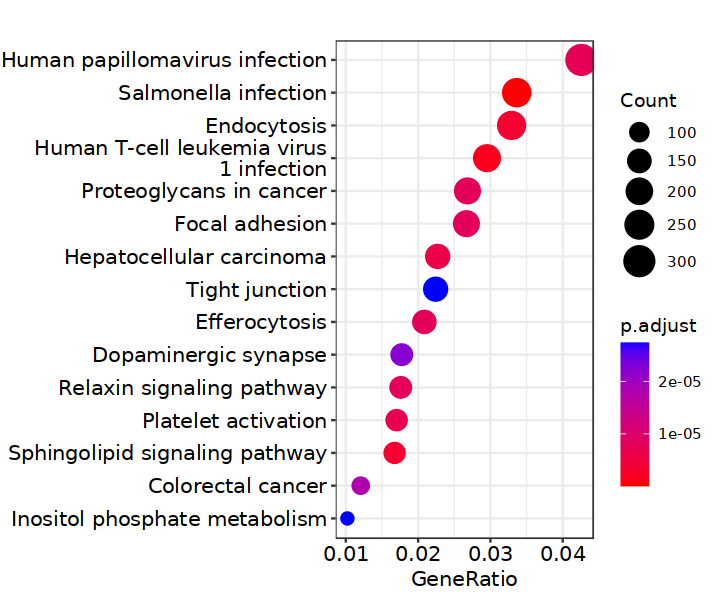

In [108]:
dotplot(enrichKK,showCategory=15)

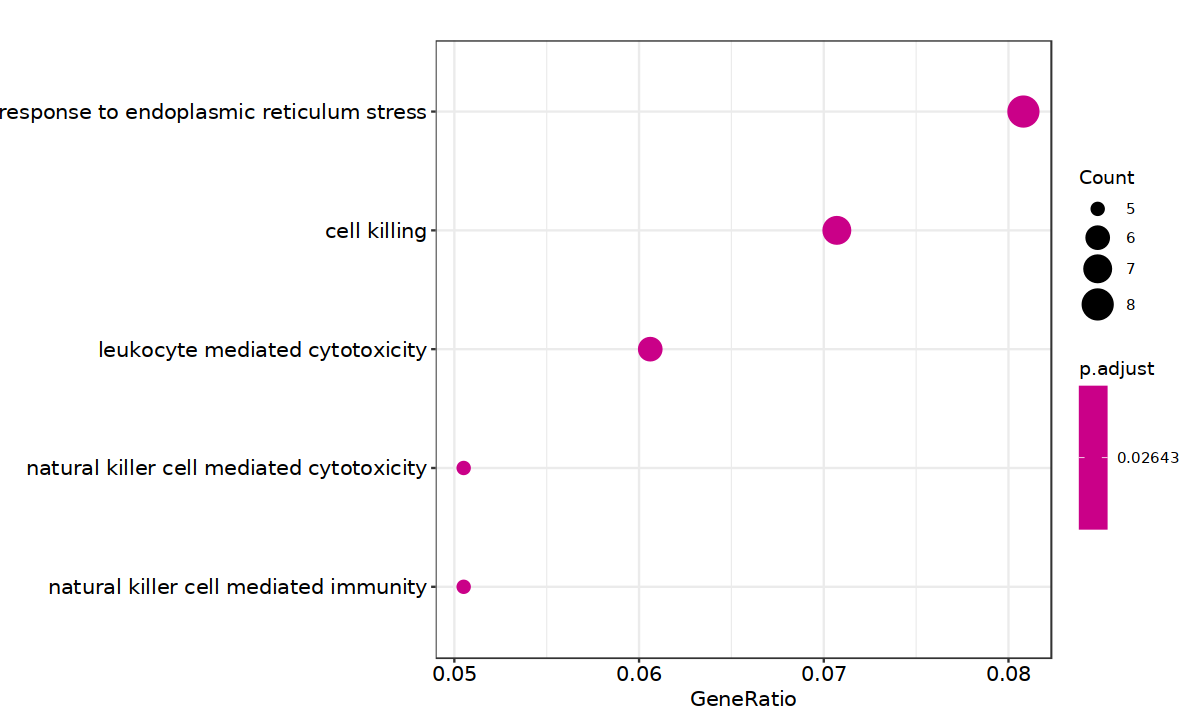

In [113]:
ego_bp_up<-enrichGO(gene       = gene_up,
                 OrgDb      = org.Hs.eg.db,
                 keyType    = 'ENTREZID',
                 ont        = "BP",
                 pAdjustMethod = "BH",
                 pvalueCutoff = 0.05,#0.01
                 qvalueCutoff = 0.05)
options(repr.plot.width = 10,repr.plot.height =6)
dotplot(ego_bp_up,showCategory = 10,label_format=100)

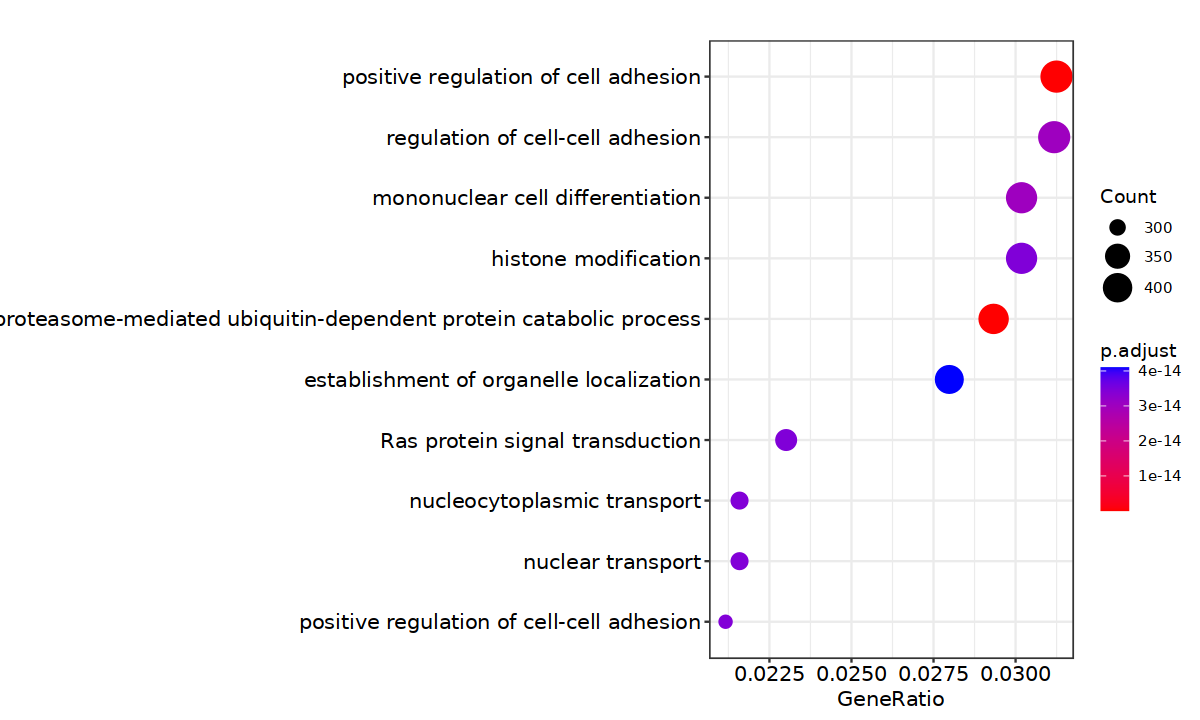

In [114]:
ego_bp_down<-enrichGO(gene       = gene_all,
                 OrgDb      = org.Hs.eg.db,
                 keyType    = 'ENTREZID',
                 ont        = "BP",
                 pAdjustMethod = "BH",
                 pvalueCutoff = 0.05,#0.01
                 qvalueCutoff = 0.5)
options(repr.plot.width = 10,repr.plot.height =6)
dotplot(ego_bp_down,showCategory = 10,label_format=100)

### 两个亚组间模型基因的差异

In [116]:
expr1 = exprSet %>% t() %>%  as.data.frame()

In [117]:
daa1 = cbind(group,expr1) %>% dplyr::select(c('group','FAM200B','BCL2A1','IGJ','TXN'))

In [119]:
require(cowplot)
require(tidyverse)
require(ggplot2)
require(ggsci)
require(ggpubr)

In [120]:
mydata<-daa1 %>% 
  ## 基因表达数据gather,gather的范围应调整
  gather(key="gene",value="Expression",FAM200B:TXN) %>% 
  ##
  dplyr::select(group,gene,Expression) 

In [121]:
compare_means( Expression ~ group, data = mydata, method = 't.test',
              group.by = "gene")
# Box plot facetted by "gene"
p <- ggboxplot(mydata, x = "group", y = "Expression",
          color = "group", palette = "jco",
          add = "jitter",
          facet.by = "gene", short.panel.labs = FALSE)
# Use only p.format as label. Remove method name.
#p + stat_compare_means(label =  "p.signif", label.x = 1.5)
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "group", palette = "nejm",
          add = "jitter")

gene,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
FAM200B,Expression,subtype1,subtype2,8.550e-01,1.00000,0.85,ns,T-test
BCL2A1,Expression,subtype1,subtype2,3.958e-01,1.00000,0.40,ns,T-test
IGJ,Expression,subtype1,subtype2,3.357e-05,0.00013,3.4e-05,****,T-test
TXN,Expression,subtype1,subtype2,4.723e-01,1.00000,0.47,ns,T-test


In [122]:
diffgene = as.data.frame(compare_means( Expression ~ group, data = mydata, method = 't.test',
              group.by = "gene"))
diffgene = rownames(diffgene) = diffgene[,1]
options(repr.plot.height = 5,repr.plot.width = 21)
options(repr.plot.width = 7,repr.plot.height = 5)

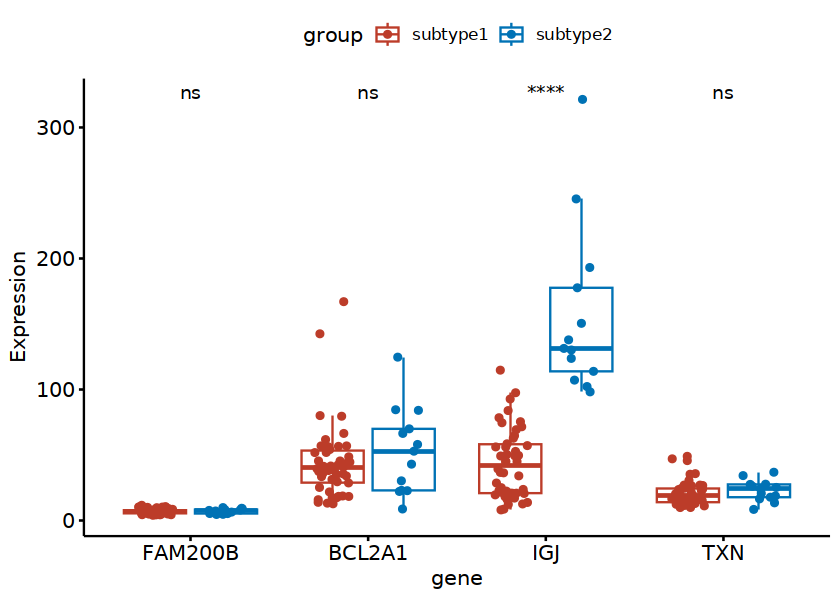

In [123]:
p + stat_compare_means(aes(group = group), label = "p.signif",method = 't.test')

### gsea分析

In [124]:
library(GSEABase)
library(limma) 
library(clusterProfiler)
library(enrichplot)

Warning message:
"package 'GSEABase' was built under R version 4.2.2"
Loading required package: annotate

Warning message:
"package 'annotate' was built under R version 4.2.2"
Loading required package: XML

Loading required package: graph

Warning message:
"package 'graph' was built under R version 4.2.3"

Attaching package: 'graph'


The following object is masked from 'package:XML':

    addNode


The following object is masked from 'package:stringr':

    boundary


Warning message:
"package 'enrichplot' was built under R version 4.2.2"

Attaching package: 'enrichplot'


The following object is masked from 'package:ggpubr':

    color_palette




In [125]:
geneList <- deg$logFC
names(geneList) <- toupper(rownames(deg))
geneList <- sort(geneList,decreasing = T)

In [126]:
geneset <- read.gmt("./kegg.gmt")

gsea_results <- GSEA(
   geneList = geneList,
   TERM2GENE = geneset,
  verbose = F,
  eps=0 )

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are duplicate gene names, fgsea may produce unexpected results."
no term enriched under specific pvalueCutoff...



In [127]:
gseaplot2(gsea_results,
          gsea_results@result[["ID"]][1],
         pvalue_table = TRUE)

ERROR: Error in if (abs(max.ES) > abs(min.ES)) {: missing value where TRUE/FALSE needed


In [ ]:
geneset <- read.gmt("./bp.gmt")

gsea_results <- GSEA(
   geneList = geneList,
   TERM2GENE = geneset,
  verbose = F,
  eps=1e-10 )

gseaplot2(gsea_results,
          gsea_results@result[["ID"]][1:3],
         pvalue_table = TRUE)

### 两个亚型的免疫评分差异和免疫检查点差异

In [128]:
ss = expr1 %>% t() %>%  as.data.frame()

In [129]:
save(ss,group,file = 'ss.rda')